In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


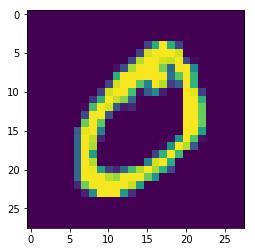

In [46]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [50]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
# pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=0.131 (0.308), test=0.133 (0.310)


In [52]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))


Data Generator mean=0.131, std=0.308


In [53]:
# calculate the mean on the test dataset
datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))


Data Generator mean=0.133, std=0.310


In [54]:
# demonstrate effect on a single batch of samples
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
# get a batch
batchX, batchy = train_iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(64, 28, 28, 1) -0.018948758 0.97950494


In [55]:
# demonstrate effect on entire training dataset
test_iterator = datagen.flow(X_train, Y_train, batch_size=256, shuffle=False)
# get a batch
batchX, batchy = test_iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

(256, 28, 28, 1) -0.013674024 0.9830863


In [56]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(16, 1,1, activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) #10
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) #6
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(16, 3, 3, kernel_regularizer=regularizers.l2(0.01))) #4
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Convolution2D(10, 4 ,4))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_16 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
activation_17 (Activation)   (None, 24, 24, 16)        0         
__________

In [58]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Defining checkpoints
from keras.callbacks import ModelCheckpoint
filepath="/content/gdrive/My Drive/Yuvaraj-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [60]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

callbacks_list.append(LearningRateScheduler(scheduler, verbose=1))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

#model.fit(X_train, Y_train, batch_size=128, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
model.fit_generator(
        train_iterator,
        steps_per_epoch=200,
        epochs=40,
        validation_data=test_iterator,
        callbacks=callbacks_list,
        validation_steps=600) 

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
200/200 [==============================] - 9s 46ms/step - loss: 1.3620 - acc: 0.7317 - val_loss: 1.6816 - val_acc: 0.5768

Epoch 00001: val_acc improved from -inf to 0.57679, saving model to /content/gdrive/My Drive/Yuvaraj-01-0.58.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
200/200 [==============================] - 7s 36ms/step - loss: 0.4578 - acc: 0.9285 - val_loss: 1.0138 - val_acc: 0.7135

Epoch 00002: val_acc improved from 0.57679 to 0.71345, saving model to /content/gdrive/My Drive/Yuvaraj-02-0.71.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
200/200 [==============================] - 7s 33ms/step - loss: 0.3234 - acc: 0.9427 - val_loss: 0.5238 - val_acc: 0.8633

Epoch 00003: val_acc improved from 0.71345 to 0.86331, saving model to /content/gdrive/My Drive/Yuvaraj-03-0.86.hdf5
Epoch 4/40

Epoch 00004: Learnin

In [0]:

score = model.evaluate_generator(test_iterator,steps=200)

In [62]:
print(score)

[0.07476587435668539, 0.9857170846768681]


In [63]:
count = model.predict_generator(test_iterator,600)
print(count.shape)

(153280, 10)


In [0]:
predicted_classes = model.predict_classes(X_test)

In [65]:
print(predicted_classes)
print(len(predicted_classes))

[7 1 1 ... 1 5 6]
10000


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

(60000, 28, 28)


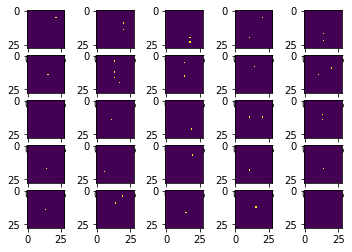

In [67]:
"""
Printing 10 images in a subplot. 
"""
print (X_train.shape)

fig, ax = plt.subplots(nrows=5, ncols=5)

i = 0

for row in ax:
	for col in row:
		if i < 100:
			col.imshow(X_train[i].astype(int))
			i += 1

In [68]:
correct = np.nonzero(predicted_classes==y_test)
print(correct)
print(len(correct))

(array([   0,    2,    3, ..., 9996, 9998, 9999]),)
1


In [69]:
incorrect = np.nonzero(predicted_classes!=y_test)
print(incorrect)

(array([   1,   20,   38, ..., 9992, 9995, 9997]),)


In [70]:
arincorr = incorrect[0][0:25]
arincorr

array([  1,  20,  38,  42,  43,  44,  50,  59,  61,  65,  66,  73,  77,
        78,  81,  84,  88,  92,  93, 104, 108, 110, 111, 116, 118])

In [71]:
X_test[3].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

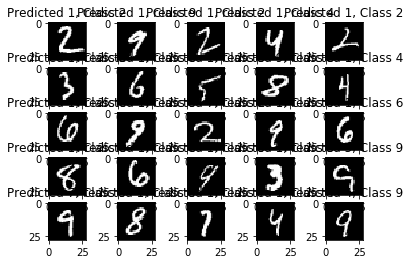

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
plots = []
count = 0
for i in range(5):
    for j in range(5):
        ax = plt.subplot2grid((5,5), (i,j))
        plt.imshow(X_test[arincorr[count]].reshape(28,28),cmap='gray',interpolation='none')
        plt.title("Predicted {}, Class {}".format(predicted_classes[arincorr[count]], y_test[arincorr[count]]))
        count = count+1
plt.show() 